# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D


# Funcs

In [2]:
def stable(r, b):
    sq = np.sqrt(b * (r - 1))
    return ((-sq, -sq, r - 1), (sq, sq, r - 1))


def lorenz_system(t, state, sigma, r, b):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (r - z) - y
    dz_dt = x * y - b * z
    return [dx_dt, dy_dt, dz_dt]

# Params

In [3]:
t_span = (0, 100)
t_eval = np.linspace(0, 100, 10000)

# Solution

## R sensitivity

### Params

In [4]:
sigma = 10.0
b = 8.0 / 3.0
r_arange = np.arange(14.0, 14 + 3 * 6, 3)
initial_state = [1.0, 1.0, 1.0]

In [5]:
r_arange

array([14., 17., 20., 23., 26., 29.])

### Testing

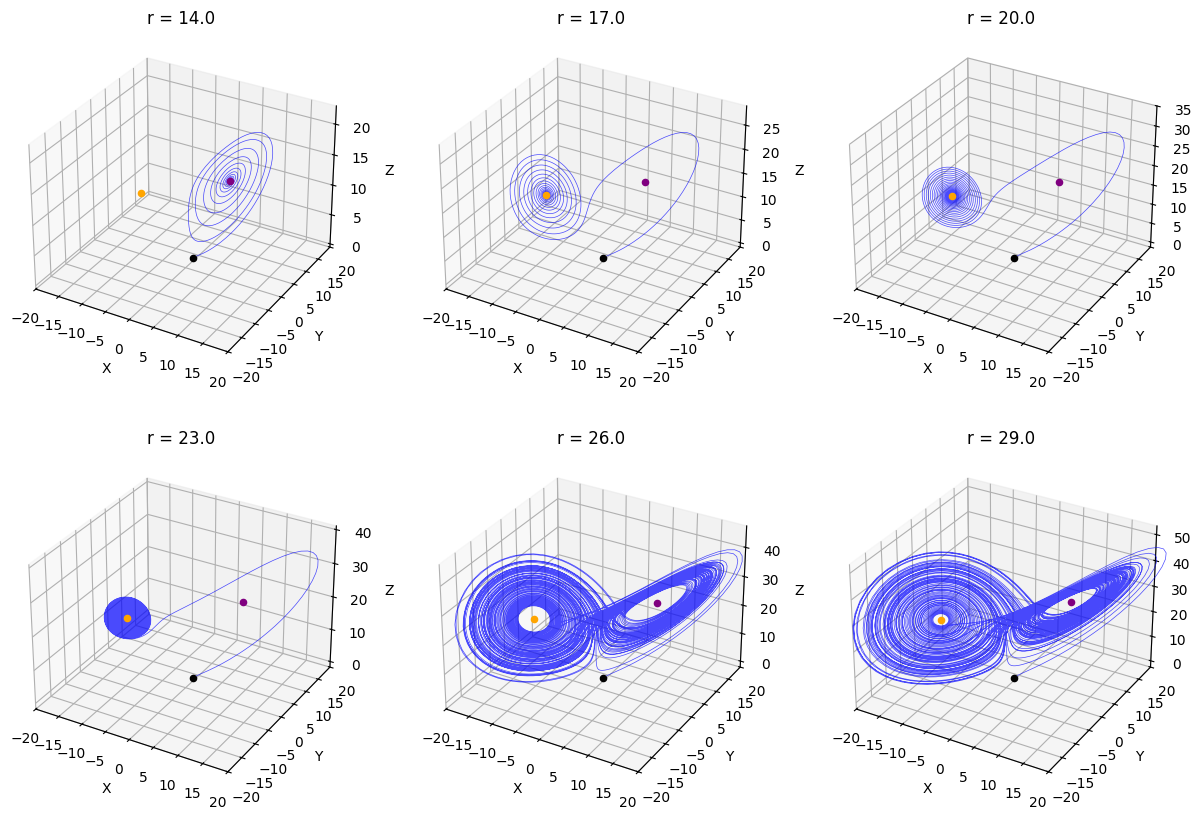

In [6]:
fig = plt.figure(figsize=(15, 10))

for idx, r in enumerate(r_arange):
    solution = solve_ivp(
        lorenz_system,
        t_span,
        initial_state,
        args=(sigma, r, b),
        t_eval=t_eval,
        method="RK45",
    )
    x, y, z = solution.y

    ax = fig.add_subplot(2, 3, idx + 1, projection="3d")
    ax.scatter(*initial_state, color="black", label="Начальные условия")
    u1, u2 = stable(r, b)
    ax.scatter(*u1, color="orange", label="Отрицательная стационарная точка")
    ax.scatter(*u2, color="purple", label="Положительная стационарная точка")
    ax.plot(x, y, z, lw=0.5, color="blue", alpha=0.7)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title(f"r = {r}")
    plt.xlim(-20, 20)
    plt.ylim(-20, 20)
plt.show()

## Initial state sensitivity

In [7]:
initial_state1 = [1.0, 1.0, 1.0]
initial_state2 = [1.001, 1.0, 1.0]
r = 28.0

### Calculation

In [8]:

t_eval = np.linspace(0, 50, 10000)
sol1 = solve_ivp(
    lorenz_system,
    t_span,
    initial_state1,
    args=(sigma, r, b),
    t_eval=t_eval,
    method="RK45",
)
sol2 = solve_ivp(
    lorenz_system,
    t_span,
    initial_state2,
    args=(sigma, r, b),
    t_eval=t_eval,
    method="RK45",
)
x1, y1, z1 = sol1.y
x2, y2, z2 = sol2.y

### Plotting

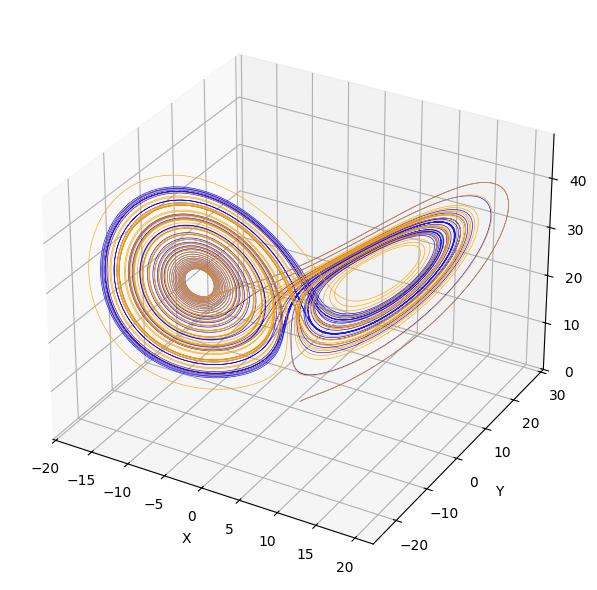

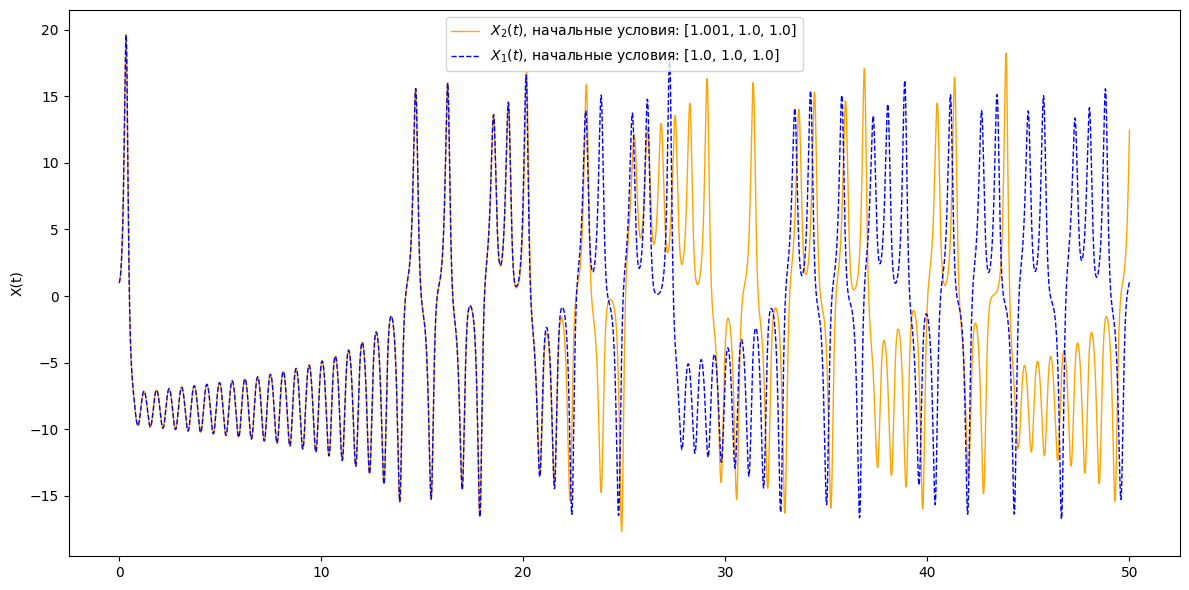

In [9]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")

ax.plot(
    x1,
    y1,
    z1,
    lw=0.5,
    color="blue",
    label=f"$X_1(t)$, начальные условия: {initial_state1}",
    alpha=0.9,
)
ax.plot(
    x2,
    y2,
    z2,
    lw=0.5,
    color="orange",
    label=f"$X_2(t)$, начальные условия: {initial_state2}",
    alpha=0.9,
)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(
    sol2.t,
    x2,
    "orange",
    label=f"$X_2(t)$, начальные условия: {initial_state2}",
    linewidth=1,
)
plt.plot(
    sol1.t, x1, "b--", label=f"$X_1(t)$, начальные условия: {initial_state1}", linewidth=1
)
plt.ylabel("X(t)")
plt.legend()
plt.tight_layout()